# Table of Contents
* [1. Introduction](#1.-Introduction)
* [2. Quick exploration of the given data](#2.-Quick-exploration-of-the-given-data)
	* [2.1 Loading the data](#2.1-Loading-the-data)
	* [2.2 Data basic description](#2.2-Data-basic-description)
* [3. Features completion](#3.-Features-completion)
	* [3.1 Age](#3.1-Age)
	* [3.2 Cabin](#3.2-Cabin)
		* [3.2.1 Cabin from name?](#3.2.1-Cabin-from-name?)
	* [3.3 Embarked](#3.3-Embarked)
	* [3.4 Fare](#3.4-Fare)
* [4. Feature detailed analysis and engineering](#4.-Feature-detailed-analysis-and-engineering)
	* [4.1 Quantitative features](#4.1-Quantitative-features)
		* [4.1.1 Age](#4.1.1-Age)
		* [4.1.2 Fare](#4.1.2-Fare)
		* [4.1.3 SibSp (Sibblings + Spouses) and Parch (Parents + children)](#4.1.3-SibSp-%28Sibblings-+-Spouses%29-and-Parch-%28Parents-+-children%29)
	* [4.2 Categorical features](#4.2-Categorical-features)
		* [4.2.1 Sex](#4.2.1-Sex)
		* [4.2.2 Embarked](#4.2.2-Embarked)
		* [4.2.3 Pclass](#4.2.3-Pclass)
	* [4.3 Feature engineering with non-classifiable](#4.3-Feature-engineering-with-non-classifiable)
		* [4.3.1 Cabin_letter](#4.3.1-Cabin_letter)
		* [4.3.2 Ticket](#4.3.2-Ticket)
* [5 Training a ML model](#5-Training-a-ML-model)
* [6 Prediction](#6-Prediction)
* [7 Pending ideas...](#7-Pending-ideas...)
	* [5.4 Head of family](#5.4-Head-of-family)


# 1. Introduction

In this notebook we'll try to create new features based on the data provided, which is called __feature engineering__. 

Moreover we will try to complete the missing data.

# 2. Quick exploration of the given data

Before starting we need to load the data and explore it a bit to understand its meaning.

## 2.1 Loading the data

In [1]:
# import the usual libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We will load both train and test data, and concat them to work on both at the same time. Just notice that the test data has the _Survived_ feature missing.

In [2]:
train_df = pd.read_csv('../input/train.csv', index_col='PassengerId')
test_df = pd.read_csv('../input/test.csv', index_col='PassengerId')
df = pd.concat([train_df, test_df])

df.sample(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket
PassengerId,,,,,,,,,,,
1258,NaN,NaN,C,14.4583,"Caram, Mr. Joseph",0,3,male,1,NaN,2689
248,24.0,NaN,S,14.5000,"Hamalainen, Mrs. William (Anna)",2,2,female,0,1.0,250649
227,19.0,NaN,S,10.5000,"Mellors, Mr. William John",0,2,male,0,1.0,SW/PP 751
438,24.0,NaN,S,18.7500,"Richards, Mrs. Sidney (Emily Hocking)",3,2,female,2,1.0,29106
1175,9.0,NaN,C,15.2458,"Touma, Miss. Maria Youssef",1,3,female,1,NaN,2650
1264,49.0,B52 B54 B56,S,0.0000,"Ismay, Mr. Joseph Bruce",0,1,male,0,NaN,112058
1136,NaN,NaN,S,23.4500,"Johnston, Master. William Arthur Willie""""",2,3,male,1,NaN,W./C. 6607
964,29.0,NaN,S,7.9250,"Nieminen, Miss. Manta Josefina",0,3,female,0,NaN,3101297
498,NaN,NaN,S,15.1000,"Shellard, Mr. Frederick William",0,3,male,0,0.0,C.A. 6212


## 2.2 Data basic description

Using pandas __.describe()__ method we can see general statistics for each feature.

In [3]:
# Have a look at other numerical features
df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,3.000000,8.000000,1.000000


Joining train and test sets there are 1309 people. There are 891 people in the train set (the ones with Survived data), but only 38% survived. The average age is 29.8 years. The fare has a wide range of prices, from free to 512. Around 38% travelled without parents nor children. The most common Pclass is 3rd. Almost half of the people travelled without sibblings nor spouse.

In [4]:
# Basic statistics for non-numerical cases
df.describe(include=['O'])

,Cabin,Embarked,Name,Sex,Ticket
count,295,1307,1309,1309,1309
unique,186,3,1307,2,929
top,C23 C25 C27,S,"Kelly, Mr. James",male,CA. 2343
freq,6,914,2,843,11


There is only information about 295 people with cabin. Most people embarked at "S", which is Southampton, UK. And there are more male than female.

# 3. Features completion

Let's first see which features need completion.

In [5]:
df.isnull().sum()

Age          263
Cabin       1014
Embarked       2
Fare           1
Name           0
Parch          0
Pclass         0
Sex            0
SibSp          0
Survived     418
Ticket         0
dtype: int64

There are 263 passengers with missing Age and a lot without Cabin. Also we have 2 missing cases in Embarked and 1 in Fare.

## 3.1 Age

We could first guess that young people don't mind travelling in 2nd or 3rd class.

In [6]:
# Let's verify the guess using train+test data, grouping by Pclass
age_grouped_by_class = df[['Pclass','Age']].groupby('Pclass').median()
age_grouped_by_class

,Age
Pclass,
1,39.0
2,29.0
3,24.0


Given that the guess looks quite correct, let's complete the missing Age cases depending on passenger's class.

In [7]:
real_age = lambda row: row.Age if not pd.isnull(row.Age) else age_grouped_by_class.loc[row.Pclass].Age
df['Age'] = df[['Age','Pclass']].apply(real_age, axis=1)

## 3.2 Cabin 

There are a lot of missing data in this feature. Let's first see if there are cabins in all classes or just in 1st class.

In [8]:
cabin_count_by_class = df[['Pclass','Cabin']].groupby('Pclass').count()
cabin_count_by_class

,Cabin
Pclass,
1,256
2,23
3,16


Let's explore the data a bit more, grouping cabins by its initial letter, which is its vessel's section or deck.

In [9]:
df['Cabin_letter'] = df['Cabin'].apply(lambda c: c[0] if not pd.isnull(c) else 'N') # N=none

df.sample(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Cabin_letter
PassengerId,,,,,,,,,,,,
916,48.0,B57 B59 B63 B66,C,262.3750,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",3,1,female,1,NaN,PC 17608,B
298,2.0,C22 C26,S,151.5500,"Allison, Miss. Helen Loraine",2,1,female,1,0.0,113781,C
128,24.0,NaN,S,7.1417,"Madsen, Mr. Fridtjof Arne",0,3,male,0,1.0,C 17369,N
830,62.0,B28,NaN,80.0000,"Stone, Mrs. George Nelson (Martha Evelyn)",0,1,female,0,1.0,113572,B
1210,27.0,NaN,S,7.8542,"Jonsson, Mr. Nils Hilding",0,3,male,0,NaN,350408,N
362,29.0,NaN,C,27.7208,"del Carlo, Mr. Sebastiano",0,2,male,1,0.0,SC/PARIS 2167,N
663,47.0,E58,S,25.5875,"Colley, Mr. Edward Pomeroy",0,1,male,0,0.0,5727,E
954,18.0,NaN,S,7.7500,"Bjorklund, Mr. Ernst Herbert",0,3,male,0,NaN,347090,N
925,24.0,NaN,S,23.4500,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",2,3,female,1,NaN,W./C. 6607,N


In [10]:
# Group by cabin letter should show us some insights...
survival_ratio = df[['Cabin_letter','Pclass','Survived']].groupby(['Cabin_letter','Pclass']).mean()
people_count = df[['Cabin_letter','Pclass','Name']].groupby(['Cabin_letter','Pclass']).count()

pd.concat([survival_ratio,people_count], axis=1).rename(columns={'Name': 'passenger_count'})

Survived  passenger_count
Cabin_letter Pclass                           
A            1       0.466667               22
B            1       0.744681               65
C            1       0.593220               94
D            1       0.758621               40
             2       0.750000                6
E            1       0.720000               34
             2       0.750000                4
             3       1.000000                3
F            2       0.875000               13
             3       0.200000                8
G            3       0.500000                5
N            1       0.475000               67
             2       0.440476              254
             3       0.235908              693
T            1       0.000000                1

It is clear that different cabins have different survival expectation, due to the situation in the ship. Apparently letters A, B, C, and T are related to 1st class; same for G, related to 3rd class. Other letters have people in different classes.

As the missing data comes from people in all classes, we can't assign easily neither cabin nor cabin letter.

### 3.2.1 Cabin from name?

If you have a look at the names provided, they are in the form "Surname, Title. Name", and in the cases of a wife "Man_surname, Man_title. Man_name (Woman_name Woman_surname)". We could use this information to find people with same family names and assign the same cabin.

In [11]:
df['surname'] = df['Name'].apply(lambda n: n.split(',')[0])
df.sample(10)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Cabin_letter,surname
PassengerId,,,,,,,,,,,,,
881,25.0,NaN,S,26.0000,"Shelley, Mrs. William (Imanita Parrish Hall)",1,2,female,0,1.0,230433,N,Shelley
486,24.0,NaN,S,25.4667,"Lefebre, Miss. Jeannie",1,3,female,3,0.0,4133,N,Lefebre
90,24.0,NaN,S,8.0500,"Celotti, Mr. Francesco",0,3,male,0,0.0,343275,N,Celotti
1284,13.0,NaN,S,20.2500,"Abbott, Master. Eugene Joseph",2,3,male,0,NaN,C.A. 2673,N,Abbott
1015,28.0,NaN,S,7.2500,"Carver, Mr. Alfred John",0,3,male,0,NaN,392095,N,Carver
1146,32.5,NaN,S,9.5000,"Wenzel, Mr. Linhart",0,3,male,0,NaN,345775,N,Wenzel
434,17.0,NaN,S,7.1250,"Kallio, Mr. Nikolai Erland",0,3,male,0,0.0,STON/O 2. 3101274,N,Kallio
1052,24.0,NaN,Q,7.7333,"Smyth, Miss. Julia",0,3,female,0,NaN,335432,N,Smyth
1170,30.0,NaN,S,21.0000,"Ware, Mr. John James",0,2,male,1,NaN,CA 31352,N,Ware


In [12]:
#Group by surname and class, in order to find people that could be a family
surnames = df[['surname','Cabin','Pclass','Name']].groupby(['surname','Pclass']).count()
surnames.head()

,,Cabin,Name
surname,Pclass,,
Abbing,3,0,1
Abbott,3,0,3
Abelseth,3,1,2
Abelson,2,0,2
Abrahamsson,3,0,1


In [13]:
# Find cases with more people than assigned cabin
missing = surnames[(surnames.Cabin>0) & (surnames.Cabin<surnames.Name)] # Notice the element-wise binary logical operator '&'
missing.rename(columns={'Name': 'passenger_count'})

,,Cabin,passenger_count
surname,Pclass,,
Abelseth,3,1,2
Brown,2,1,4
Frauenthal,1,1,3
Hoyt,1,2,3
Keane,2,1,2
Peter,3,1,3
Wick,1,1,3


We found just 7 cases of (probably) families with missing cabins. Let's have a look at the Brown...

In [14]:
df[df['surname']=='Brown']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Cabin_letter,surname
PassengerId,,,,,,,,,,,,,
195,44.0,B4,C,27.7208,"Brown, Mrs. James Joseph (Margaret Tobin)",0,1,female,0,1.0,PC 17610,B,Brown
346,24.0,F33,S,13.0000,"Brown, Miss. Amelia ""Mildred""",0,2,female,0,1.0,248733,F,Brown
671,40.0,NaN,S,39.0000,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",1,2,female,1,1.0,29750,N,Brown
685,60.0,NaN,S,39.0000,"Brown, Mr. Thomas William Solomon",1,2,male,1,0.0,29750,N,Brown
1067,15.0,NaN,S,39.0000,"Brown, Miss. Edith Eileen",2,2,female,0,NaN,29750,N,Brown
1248,59.0,C101,S,51.4792,"Brown, Mrs. John Murray (Caroline Lane Lamson)",0,1,female,2,NaN,11769,C,Brown


In this case we can't assign any cabin to the passengers 671, 685 and 1067 (the ones without cabin) because they are actually an independent family, as they have the same ticket number and moreover Parch and SibSp numbers made us to suspect so.

Let's try with the Hoyt...

In [15]:
df[df['surname']=='Hoyt']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Cabin_letter,surname
PassengerId,,,,,,,,,,,,,
225,38.0,C93,S,90.0000,"Hoyt, Mr. Frederick Maxfield",0,1,male,1,1.0,19943,C,Hoyt
487,35.0,C93,S,90.0000,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",0,1,female,1,1.0,19943,C,Hoyt
794,39.0,NaN,C,30.6958,"Hoyt, Mr. William Fisher",0,1,male,0,0.0,PC 17600,N,Hoyt


In this case too we can't assign any cabin as the third passenger is clearly not related with the couple.

We have seen 2 cases but didn't found any useful way to get the cabin from the surname, a pity. So we will leave this feature as it's now.

## 3.3 Embarked

There were 3 ports of embarkation, coded as: C = Cherbourg (France), Q = Queenstown (UK), S = Southampton (UK). Let's see how many passengers embarked in each port.

In [16]:
embarked_count = df[['Embarked','Name']].groupby(by='Embarked').count()
embarked_survived = df[['Embarked','Survived','Pclass']].groupby(by='Embarked').mean()
pd.concat([embarked_count,embarked_survived], axis=1).sort_values(by='Name', ascending=False).rename(columns={'Name': 'passenger_count'})

,passenger_count,Survived,Pclass
Embarked,,,
S,914,0.336957,2.347921
C,270,0.553571,1.851852
Q,123,0.389610,2.894309


Most people embarked at Southampton (914) but we can notice that people that embarked in the continent (C) have more chances of surviving, perhaps due to a higher Pclass.

An easy way to fill in missing values is using "S", as it's by far the most common case: this is called imputation. As there is just 2 missing cases, this solution will be enough.

In [17]:
df['Embarked'].fillna('S', inplace=True)

## 3.4 Fare

As there is only one missing value, so let's explore its case directly:

In [18]:
df[pd.isnull(df.Fare)]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Cabin_letter,surname
PassengerId,,,,,,,,,,,,,
1044,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,3,male,0,NaN,3701,N,Storey


We can assign a fare given the average fare of similar cases.

In [19]:
estimated_fare = df[(df.Embarked=='S') & (df.Pclass==3)].Fare.mean()
df['Fare'].fillna(estimated_fare, inplace=True)

# 4. Feature detailed analysis and engineering

Some quantitative features could be used directly as input of the ML model (expecting there will be some correlation). Other features (categorical and non-classificable ones) will need further process to make them useful.

* **Quantitative**, that is, numbers that are easy to work with
    * Continuous: Age, Fare
    * Discrete: SibSp, Parch


* **Categorical**, that represent categories, and will need some processing
    * Nominal: Embarked, Sex
    * Ordered: Pclass
    
 
* **Non classifiable**, that will need some feature engineering to make them useful
    * Strings: Cabin, Ticket, Name

## 4.1 Quantitative features

### 4.1.1 Age

Let's explore now the relation between survived ratio and age, grouping by decades.

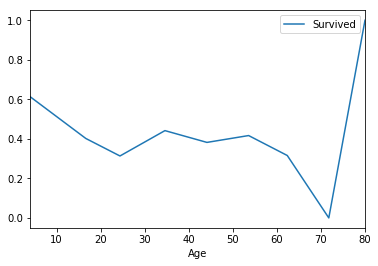

In [20]:
grouped_ages = df[['Age','Survived']].groupby(by=lambda index: int(df.loc[index]['Age']/10)).mean()
grouped_ages.plot(x='Age', y='Survived')

In [21]:
#Why the line goes up in 80 years? An outlier?
df[df['Age']>=80]

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Cabin_letter,surname
PassengerId,,,,,,,,,,,,,
631,80.0,A23,S,30.0,"Barkworth, Mr. Algernon Henry Wilson",0,1,male,0,1.0,27042,A,Barkworth


In most cases, the older the person the less probability of survival. So it's obvious this feature will be helpful for our ML model.

We could use this feature directly, or group by decades; as we don't know which one could be better, let's give both to the ML model.

We will save interesting features' names in a variable called _useful_.

In [22]:
df['decade'] = df['Age'].apply(lambda age: int(age/10))

# We will save useful features (column names) for later.
useful = ['Age', 'decade']

### 4.1.2 Fare

The first intuition is to think that cheapest tickets will be related with more deaths, but let's plot it.

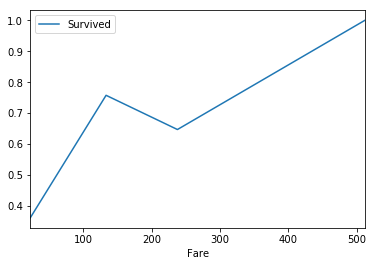

In [23]:
# Grouping by 100s
fare_grouped = df[['Fare', 'Survived']].groupby(by=lambda i: int(df.loc[i]['Fare']/100)).mean()
fare_grouped.plot(x='Fare', y='Survived')

It is clear that cheaper tickets will have less chance of survival. We can use this as input too.

In [24]:
useful.append('Fare')

### 4.1.3 SibSp (Sibblings + Spouses) and Parch (Parents + children)

Will having family of the similar age (sibblings + spouse) help? Let's find out!

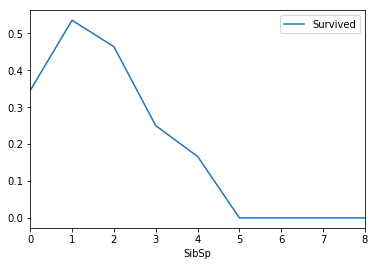

In [25]:
sibblings_grouped = df[['SibSp', 'Survived']].groupby('SibSp').mean()
sibblings_grouped.plot()

Being alone or having a big family seems a problem. Let's see the case with parents and children value.

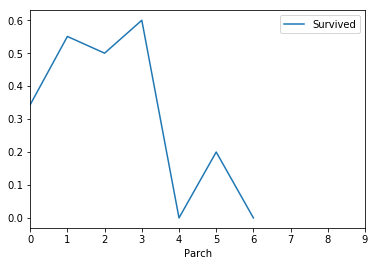

In [26]:
generations_grouped = df[['Parch', 'Survived']].groupby('Parch').mean()
generations_grouped.plot()

In this case, again being alone or being in a big family is a problem for your survival, but the correlation is not that clear.

We could reframe this information with new features: being alone and the size of the family.

In [27]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1
df['alone'] = df['family_size'].apply(lambda s: 1 if s==1 else 0)

useful.extend(['SibSp', 'Parch', 'family_size', 'alone'])

## 4.2 Categorical features

### 4.2.1 Sex

Let's see which sex has more chances of surviving.

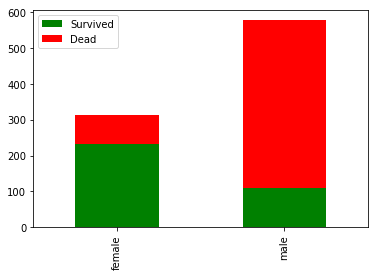

In [28]:
survived_sex = df[df['Survived']==1]['Sex'].value_counts()
survived_sex.name='Survived'
dead_sex = df[df['Survived']==0]['Sex'].value_counts()
dead_sex.name='Dead'

table = pd.DataFrame([survived_sex,dead_sex])

table.T.plot(kind='bar', stacked=True, color='gr')

It is clear that most females survived, while most men died. Let's encode it as values.

In [29]:
df['male'] = df['Sex'].map({'male': 1, 'female': 0})

useful.append('male')

### 4.2.2 Embarked

As we have seen while completing the missing values of this feature, there is some relation with the survival chances.

Let's see it again, but splitting by Pclass.

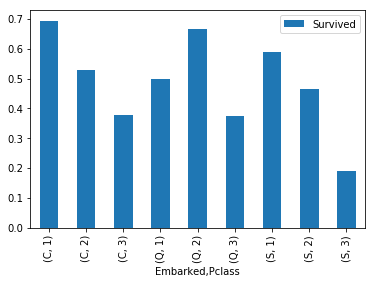

In [30]:
embarked_grouped = df[['Embarked', 'Pclass', 'Survived']].groupby(['Embarked','Pclass']).mean()
embarked_grouped.plot(kind='bar')

It's clear than there is differences and we need to encode this feature in multiple columns (one-hot encoding), that can be done with pandas get_dummies().

In [31]:
df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='embarked')], axis=1)

useful.extend(['embarked_{}'.format(x) for x in ['C', 'S', 'Q']])
df.sample(5)

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,Ticket,Cabin_letter,surname,decade,family_size,alone,male,embarked_C,embarked_Q,embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,
963,21.0,NaN,S,7.8958,"Minkoff, Mr. Lazar",0,3,male,0,NaN,349211,N,Minkoff,2,1,1,1,0,0,1
681,24.0,NaN,Q,8.1375,"Peters, Miss. Katie",0,3,female,0,0.0,330935,N,Peters,2,1,1,0,0,1,0
210,40.0,A31,C,31.0000,"Blank, Mr. Henry",0,1,male,0,1.0,112277,A,Blank,4,1,1,1,1,0,0
1086,8.0,NaN,S,32.5000,"Drew, Master. Marshall Brines",2,2,male,0,NaN,28220,N,Drew,0,3,0,1,0,0,1
625,21.0,NaN,S,16.1000,"Bowen, Mr. David John ""Dai""",0,3,male,0,0.0,54636,N,Bowen,2,1,1,1,0,0,1


### 4.2.3 Pclass

We have seen several times by now that there is a direct correlation between the class and the chance of survival. As this feature is already a number, we do not need to apply any process.

In [32]:
useful.append('Pclass')

## 4.3 Feature engineering with non-classifiable 

While doing feature completion we have already done some feature engineering that need further process: Cabin_letter (deck) and surname. Let's try out more ideas!

### 4.3.1 Cabin_letter

We just need to encode it in multiple columns.

In [33]:
df = pd.concat([df, pd.get_dummies(df['Cabin_letter'], prefix='deck')], axis=1)

letters = df['Cabin_letter'].unique()
useful.extend(['deck_{}'.format(x) for x in letters])

### 4.3.2 Ticket

From previous exploration we noticed that a ticket can be shared among several passengers. Let's explore it a bit more.

In [34]:
ticket_count = df[['Ticket', 'Name']].groupby('Ticket').count().rename(columns={'Name':'count'}).sort_values(by='count', ascending=False)
ticket_count.head()

,count
Ticket,
CA. 2343,11
1601,8
CA 2144,8
3101295,7
347077,7


Several people have shared a ticket in some cases, which means that there were groups of friends or colleages that, despite they don't have family relation, we should consider them as a group. Let's verify if with ticket "1601".

In [35]:
df[df['Ticket']=='1601']

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Survived,...,embarked_S,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_N,deck_T
PassengerId,,,,,,,,,,,,,,,,,,,,,
75,32.0,NaN,S,56.4958,"Bing, Mr. Lee",0,3,male,0,1.0,...,1,0,0,0,0,0,0,0,1,0
170,28.0,NaN,S,56.4958,"Ling, Mr. Lee",0,3,male,0,0.0,...,1,0,0,0,0,0,0,0,1,0
510,26.0,NaN,S,56.4958,"Lang, Mr. Fang",0,3,male,0,1.0,...,1,0,0,0,0,0,0,0,1,0
644,24.0,NaN,S,56.4958,"Foo, Mr. Choong",0,3,male,0,1.0,...,1,0,0,0,0,0,0,0,1,0
693,24.0,NaN,S,56.4958,"Lam, Mr. Ali",0,3,male,0,1.0,...,1,0,0,0,0,0,0,0,1,0
827,24.0,NaN,S,56.4958,"Lam, Mr. Len",0,3,male,0,0.0,...,1,0,0,0,0,0,0,0,1,0
839,32.0,NaN,S,56.4958,"Chip, Mr. Chang",0,3,male,0,1.0,...,1,0,0,0,0,0,0,0,1,0
931,24.0,NaN,S,56.4958,"Hee, Mr. Ling",0,3,male,0,NaN,...,1,0,0,0,0,0,0,0,1,0


So our guess can be true. Among ticket '1601' there are people with similar names' origin, but no family indicators (both Parch and SibSp are zeros).

Wait a moment! If the ticket is shared, we should divide the Fare among the people who share the ticket. Let's add this new feature too.

In [36]:
df['ticket_owners'] = df['Ticket'].apply(lambda x: ticket_count.loc[x])
df['shared_fare'] = df['Fare'] / df['ticket_owners']

useful.extend(['ticket_owners', 'shared_fare'])

We could also find the average surviving ratio of people with same ticket, that might be useful to estimate other member's.

In [37]:
ticket_surviving = df[['Ticket', 'Survived']].groupby('Ticket').mean().sort_values(by='Survived', ascending=False)

#if we don't have the Survival of any of the Ticket owners, use 0.3838 (mean value of train dataset)
group_surviving = lambda x: ticket_surviving.loc[x].Survived if pd.notnull(ticket_surviving.loc[x].Survived) else 0.3838
df['ticket_survival'] = df['Ticket'].apply(group_surviving)

useful.append('ticket_survival')

### 4.3.3 Name

As this field is text, we could try to get the language using _langid_ library. Perhaps people who spoke other languages except English had more problems to understand emergency directions.

In [38]:
import langid

df['lang'] = df['Name'].apply(lambda n: langid.classify(n)[0])
df[['Name','lang']].sample(10)

,Name,lang
PassengerId,,
991,"Nancarrow, Mr. William Henry",en
180,"Leonard, Mr. Lionel",it
264,"Harrison, Mr. William",en
998,"Buckley, Mr. Daniel",en
58,"Novel, Mr. Mansouer",en
664,"Coleff, Mr. Peju",en
1285,"Gilbert, Mr. William",da
411,"Sdycoff, Mr. Todor",es
976,"Lamb, Mr. John Joseph",en


Despite _langid_ did not a perfect job with just a few words to work with, we can get an idea about the language that each passenger could have used.

As reference, these are the codes for some languages: af=Afrikaans, cs=Czech, cy=Welsh, da=Danish, de=German, en=English, eo=Esperanto, es=Spanish, et=Estonian, eu=Basque, fi=Finnish, fr=France, id=Indonesian, it=Italy, la=Latin, lt=Lithuanian, lv=Latvian, mt=Maltese, nl=Dutch, nn=Norwegian N., no=Norwegian, pl=Polish, pt=Portuguese, ro=Romanian, rw=Rwanda, sk=Slovak, sl=Slovenian, sv=Swedish, tl=Tagalog, tr=Turkish, xh=Xhosa (South Africa), zh=Chinese.

In [39]:
language_groups = {
    'uk': ('cy', 'en'),
    'latin': ('es', 'fr', 'it', 'la', 'pt', 'ro'),
    'germanic': ('da', 'nl'),
    'north': ('fi', 'nn', 'no', 'sv'),
    'east_europe': ('cs', 'pl','sk','sl'),
    'african': ('af', 'rw', 'xh'),
    'russian': ('et', 'lt', 'lv'),
    'asian': ('id', 'tl', 'tr')
}
language_map = { y:x for x in language_groups for y in language_groups[x]}    

df['lang_group'] = df['lang'].apply(lambda l: language_map[l] if l in language_map else 'other')
df[['lang_group','lang','Survived']].groupby(['lang_group','lang']).mean()

Survived
lang_group  lang          
african     af    1.000000
            rw    0.500000
            xh         NaN
asian       id    0.555556
            tl    0.000000
            tr    0.000000
east_europe cs    0.000000
            pl    0.250000
            sk    0.142857
            sl    0.000000
germanic    da    0.375000
            nl    0.312500
latin       es    0.512195
            fr    0.440000
            it    0.400000
            la    0.333333
            pt    0.285714
            ro    0.000000
north       fi    0.454545
            nn    1.000000
            no    0.250000
            sv    0.500000
other       br         NaN
            de    0.392857
            eo    1.000000
            eu    0.333333
            ga    0.000000
            hr    0.000000
            hu    0.000000
            is    1.000000
            mg    1.000000
            ms    0.500000
            mt    0.444444
            oc         NaN
            sw    0.000000
            vo    0.333333
            zu    0.000000
russian     et    0.178571
            lt    0.375000
            lv    0.000000
uk          cy    0.500000
            en    0.381443

In [40]:
df = pd.concat([df, pd.get_dummies(df['lang'], prefix='lang')], axis=1)

langs = df['lang'].unique()
useful.extend(['lang_{}'.format(x) for x in langs])

# 5 Training a ML model

We will be training a Random Forest Classifier with the features we set as useful. Firsly we should split out the train set from our complete dataframe.

In [41]:
train = df[df['Survived'].notnull()]
train_X = train[useful]
train_y = train['Survived']

We will run a quick try with Random Forest just to get an estimation of feature importance. This is useful to know, when further feature engineering is necesary, which cases are candidates to further analysis and engineering.

In [42]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=1)
clf = clf.fit(train_X, train_y)

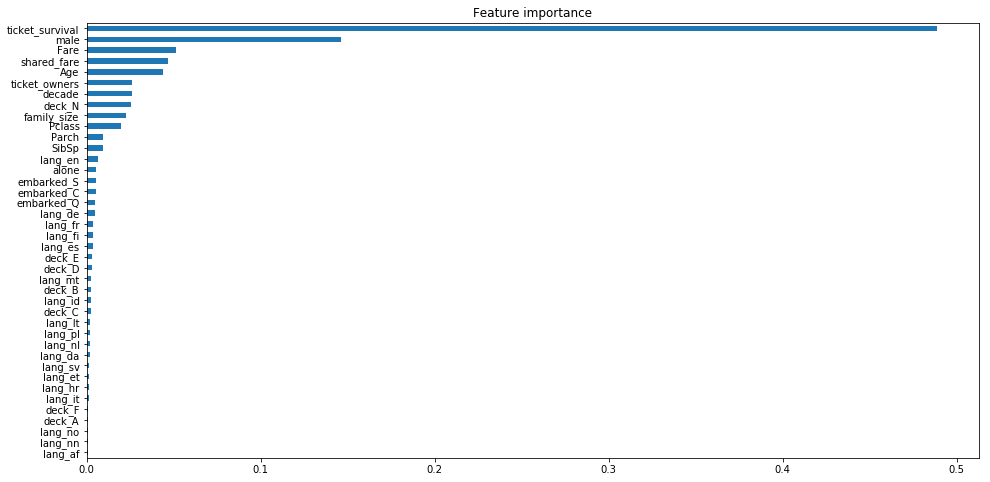

In [43]:
importances = pd.DataFrame(clf.feature_importances_, index=train_X.columns, columns=['importance']).sort_values(by='importance')
importances.tail(40).plot.barh(figsize=(16,8), legend=None, title='Feature importance')

Funny enough, some of our synthetic features are more relevant than apparently important features like Pclass.

Now let's do a extend search for the best hyperparams. With GridSearchCV() we can try out different hyperparams for our model so automatically it will find the best combination. This will take a bit.

In [45]:
from sklearn.model_selection import GridSearchCV

search=True #Set to True or False to search all combinations or use previous results
if search:
    parameter_grid = {
        'max_depth' : [4, 6, 8, 10, None],
        'n_estimators': [10, 30, 50, 70, 90],
        'max_features': ['sqrt', 'log2', None],
        'min_samples_split': [2, 4, 6, 8, 10],
        'min_samples_leaf': [1, 2, 3],
        'random_state': [1]
    }
    forest = RandomForestClassifier()
    gs = GridSearchCV(
        forest,
        scoring='accuracy',
        param_grid=parameter_grid,
        cv=2,
        n_jobs=-1)
    gs.fit(train_X, train_y)
    params = gs.best_params_
    print(params)
else:
    params = {
        'max_depth': 6,
        'max_features': 'auto',
        'min_samples_leaf': 1,
        'min_samples_split': 10,
        'n_estimators': 30,
        'random_state': 1
    }

{'max_depth': 6, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10, 'random_state': 1}


In [46]:
# Use the params to get a score with the training set
clf = RandomForestClassifier(**params)
clf = clf.fit(train_X, train_y)
clf.score(train_X, train_y)

0.99887766554433222

# 6 Prediction

In [47]:
test = df[df['Survived'].isnull()]
test_X = test[useful]
test_y = clf.predict(test_X)

In [48]:
submit = pd.DataFrame(test_y.astype(int), index=test_X.index, columns=['Survived'])
submit.head()

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [49]:
submit.to_csv('../output/submission.csv')

# 7 Pending ideas...

Head of family

We wonder if the head of family lives, the rest of the family also lives. In a family, the man will try to save his wife and children *before* himself. So maybe this information can help us.

In [ ]:
fields = ['Name','Survived','SibSp','Parch','Ticket','male', 'family_size']
tickets_grouped = df[fields].groupby(['Ticket','PassengerId']).mean()
tickets_grouped[(tickets_grouped['family_size']>1]

In [ ]:
df[['Name','Survived','SibSp','Parch','Ticket']].reindex